In [10]:
import requests
import json
import pandas as pd
import numpy as np
from io import StringIO 
import time
import matplotlib.pyplot as plt
#token expires
token = 'eyJ4NXQiOiJZV0kxTTJZNE1qWTNOemsyTkRZeU5XTTRPV014TXpjek1UVmhNbU14T1RSa09ETXlOVEE0Tnc9PSIsImtpZCI6ImdhdGV3YXlfY2VydGlmaWNhdGVfYWxpYXMiLCJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiJ9.eyJzdWIiOiJBbGVleFY2QGNhcmJvbi5zdXBlciIsImFwcGxpY2F0aW9uIjp7Im93bmVyIjoiQWxlZXhWNiIsInRpZXJRdW90YVR5cGUiOm51bGwsInRpZXIiOiJVbmxpbWl0ZWQiLCJuYW1lIjoiRGVmYXVsdEFwcGxpY2F0aW9uIiwiaWQiOjEzNDgyLCJ1dWlkIjoiYjIwZWI3NWQtZDcxMS00MjJlLThlMzAtMWMzMzgwY2FlNzVjIn0sImlzcyI6Imh0dHBzOlwvXC9wb3J0YWlsLWFwaS5tZXRlb2ZyYW5jZS5mcjo0NDNcL29hdXRoMlwvdG9rZW4iLCJ0aWVySW5mbyI6eyI1MFBlck1pbiI6eyJ0aWVyUXVvdGFUeXBlIjoicmVxdWVzdENvdW50IiwiZ3JhcGhRTE1heENvbXBsZXhpdHkiOjAsImdyYXBoUUxNYXhEZXB0aCI6MCwic3RvcE9uUXVvdGFSZWFjaCI6dHJ1ZSwic3Bpa2VBcnJlc3RMaW1pdCI6MCwic3Bpa2VBcnJlc3RVbml0Ijoic2VjIn19LCJrZXl0eXBlIjoiUFJPRFVDVElPTiIsInN1YnNjcmliZWRBUElzIjpbeyJzdWJzY3JpYmVyVGVuYW50RG9tYWluIjoiY2FyYm9uLnN1cGVyIiwibmFtZSI6IkRvbm5lZXNQdWJsaXF1ZXNDbGltYXRvbG9naWUiLCJjb250ZXh0IjoiXC9wdWJsaWNcL0RQQ2xpbVwvdjEiLCJwdWJsaXNoZXIiOiJhZG1pbl9tZiIsInZlcnNpb24iOiJ2MSIsInN1YnNjcmlwdGlvblRpZXIiOiI1MFBlck1pbiJ9XSwiZXhwIjoxODE1OTAxMDk0LCJ0b2tlbl90eXBlIjoiYXBpS2V5IiwiaWF0IjoxNzIxMjI4Mjk0LCJqdGkiOiI4MTI0YThkMC1iNzYwLTQyYTgtYjI2NC0yMjdjYjI3ZWU3NzgifQ==.VxtIX1pocka9HCirbRsS5mBZ8rdQVy_n4vfNwIVMB7o-sB2zzGNFvNiIEQpiBmtqMHZWLBJavGIIKfGI7EJ2QiXImiA3jjiiLc93jfzHGqMhB-0R5L0ygRLfAYvQ0mbKHZrgAVNQ3RQa5D60ckb1QkzrPfSFcScXeFBGDwiGqmSrBAvUqui13yMAHgCU9PAYdJ_YdgnOt3jiUCS6nvDg_Yt_mB4ibABv5EWOVzNBuJUGSdwk_ygZBQfHfFcmjCdyp6PJR91_Gk4iL9m9UvuF2iR995UlxHy4F9wKRI7CZhvmU_BVABZuL2CcqxGTTnxfJbBP4Q8rQymjnEFVg-wrow=='
headers = {'apikey': token}
import gzip
import os

In [2]:
start = ['2000-01-01T00:00:00Z', '2001-01-01T00:00:00Z', '2002-01-01T00:00:00Z', '2003-01-01T00:00:00Z', '2004-01-01T00:00:00Z', '2005-01-01T00:00:00Z',
        '2006-01-01T00:00:00Z', '2007-01-01T00:00:00Z', '2008-01-01T00:00:00Z', '2009-01-01T00:00:00Z', '2010-01-01T00:00:00Z', '2011-01-01T00:00:00Z']
end = ['2000-12-31T23:00:00Z', '2001-12-31T23:00:00Z', '2002-12-31T23:00:00Z', '2003-12-31T23:00:00Z', '2004-12-31T23:00:00Z', '2005-12-31T23:00:00Z',
      '2006-12-31T23:00:00Z', '2007-12-31T23:00:00Z', '2008-12-31T23:00:00Z', '2009-12-31T23:00:00Z', '2010-12-31T23:00:00Z', '2011-12-31T23:00:00Z']
hdf = [2,59,60,62,80]

In [3]:
def get_first_two_digits(n):
    str_n = str(abs(n))  # Use abs to handle negative numbers correctly
    first_two_digits = str_n[:2]
    return int(first_two_digits)

In [4]:
def get_station_list(departement):
    url = f'https://public-api.meteofrance.fr/public/DPClim/v1/liste-stations/quotidienne?id-departement={departement}'
    r = requests.get(url, headers=headers)
    df = pd.DataFrame(r.json())
    return df

In [5]:
def retreive_data(id_request):
    url = f'https://public-api.meteofrance.fr/public/DPClim/v1/commande/fichier?id-cmde={id_request}'
    while True:
        r = requests.get(url, headers=headers)
        if r.status_code == 201:
            content = r.content.decode('utf-8')
            data = StringIO(content)
            df = pd.read_csv(data, delimiter=';')
            df['DEPARTEMENT'] = df['POSTE'].apply(get_first_two_digits)
            return df
        elif r.status_code == 204:
            time.sleep(5)
        elif r.status_code == 502:
            #print('502 found, sleeping...')
            time.sleep(5)
        else:
            print(f"Unexpected status code: {r.status_code}")
            break

In [9]:
def request_data(id_station_list, start_date, end_date):
    df_list = []
    for station in id_station_list:
        print(station)
        if station == '60500005':
            print('60500005 found, breaking')
            continue
        for start, end in zip(start_date, end_date):
            url = f'https://public-api.meteofrance.fr/public/DPClim/v1/commande-station/quotidienne?id-station={station}&date-deb-periode={start}&date-fin-periode={end}'
            while True:
                r = requests.get(url, headers=headers)  
                if r.status_code == 202:
                    returnedData = retreive_data(r.json()['elaboreProduitAvecDemandeResponse']['return'])
                    #print(f"Station : {station} | {start} - {end} | {r} OK")
                    #print('--------------')
                    df_list.append(returnedData)    
                    break
                else:
                    print(f"Can't find data for {station}, {start} to {end}, response : {r.status_code}, sleeping...")
                    time.sleep(5)
    df = pd.concat(df_list).reset_index(drop=True)                    
    return df

In [11]:
lol = get_station_list(60)
lol[lol['posteOuvert']]['id']

9      60040001
23     60107001
58     60260001
60     60276001
69     60322001
73     60363001
80     60382001
91     60445001
104    60500004
105    60500005
108    60518001
115    60555002
117    60566001
131    60623001
132    60639001
136    60652001
Name: id, dtype: object

In [10]:
list_hdf = []
for dep in hdf:
    data = get_station_list(dep)
    df = request_data(data[data['posteOuvert']]['id'], start, end)
    list_hdf.append(df)
df_hdf = pd.concat(listhdf).reset_index(drop=True)
df_hdf

02037002
found


KeyboardInterrupt: 

In [9]:
df_hdf.to_csv('data/hdf_2000_2011.csv')

In [31]:
x = df[df['POSTE'] == 79191005]
x['DATE'] = x['DATE'] = pd.to_datetime(x['DATE'], format='%Y%m%d')

C:\Users\alexl\AppData\Local\Temp\ipykernel_668\2425319547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['DATE'] = x['DATE'] = pd.to_datetime(x['DATE'], format='%Y%m%d')


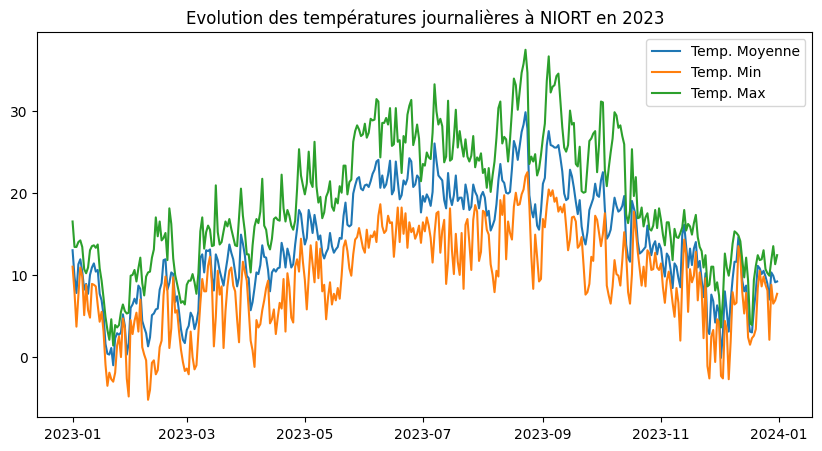

In [66]:
x = x[x['DATE'].dt.year == 2023]
x = x.sort_values(by='DATE')
x['TM'] = x['TM'].replace(',', '.', regex=True).astype(float)
x['TN'] = x['TN'].replace(',', '.', regex=True).astype(float)
x['TX'] = x['TX'].replace(',', '.', regex=True).astype(float)
plt.figure(figsize=(10, 5))
plt.plot(x['DATE'], x['TM'], label='Temp. Moyenne')
plt.plot(x['DATE'], x['TN'], label='Temp. Min')
plt.plot(x['DATE'], x['TX'], label='Temp. Max')
plt.title('Evolution des températures journalières à NIORT en 2023')
plt.legend()
plt.show()

In [14]:
df = pd.read_csv('data/nouvelle_aquitaine1_2000_2005.csv')
df2 = pd.read_csv('data/nouvelle_aquitaine1_2006_2014.csv')
df3 = pd.read_csv('data/nouvelle_aquitaine2_2000_2005.csv')
df4 = pd.read_csv('data/nouvelle_aquitaine2_2006_2014.csv')

newDf = pd.concat([df, df2, df3, df4])
newDf['DATE'] = newDf['DATE'] = pd.to_datetime(newDf['DATE'], format='%Y%m%d')
newDf

C:\Users\alexl\AppData\Local\Temp\ipykernel_4284\3334513380.py:1: DtypeWarning: Columns (11,12,16,17,18,19,22,25,26,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/nouvelle_aquitaine1_2000_2005.csv')
C:\Users\alexl\AppData\Local\Temp\ipykernel_4284\3334513380.py:2: DtypeWarning: Columns (9,11,12,16,17,18,19,22,25,26,29,38,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('data/nouvelle_aquitaine1_2006_2014.csv')
C:\Users\alexl\AppData\Local\Temp\ipykernel_4284\3334513380.py:3: DtypeWarning: Columns (11,12,16,18,19,22,25,26,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('data/nouvelle_aquitaine2_2000_2005.csv')
C:\Users\alexl\AppData\Local\Temp\ipykernel_4284\3334513380.py:4: DtypeWarning: Columns (9,11,12,16,17,18,19,22,25,26,29,38,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.rea

,Unnamed: 0,POSTE,DATE,RR,DRR,TN,HTN,TX,HTX,TM,...,ECLAIR,ETPMON,ETPGRILLE,UV,TMERMAX,TMERMIN,HNEIGEF,NEIGETOTX,NEIGETOT06,DEPARTEMENT
0,0,16028001,2000-01-01,"0,3",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
1,1,16028001,2000-01-02,"0,0",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
2,2,16028001,2000-01-03,"0,0",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
3,3,16028001,2000-01-04,"0,1",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
4,4,16028001,2000-01-05,"0,0",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350242,350242,87187003,2014-12-27,"2,6",NaN,"2,0",1828.0,"8,8",651.0,"5,2",...,NaN,"0,6","0,6",NaN,NaN,NaN,NaN,NaN,NaN,87
350243,350243,87187003,2014-12-28,"0,0",NaN,"-1,5",1728.0,"1,0",601.0,"-0,6",...,NaN,"0,5","0,5",NaN,NaN,NaN,NaN,NaN,NaN,87
350244,350244,87187003,2014-12-29,"0,0",NaN,"-6,3",602.0,"3,1",1249.0,"-2,1",...,NaN,"1,1","1,1",NaN,NaN,NaN,NaN,NaN,NaN,87
350245,350245,87187003,2014-12-30,"0,0",NaN,"-1,2",1826.0,"4,3",1340.0,"0,5",...,NaN,"0,7","0,7",NaN,NaN,NaN,NaN,NaN,NaN,87


In [18]:
prevDf = pd.read_csv('data/nouvelle_aquitaine_total.csv')
prevDf['DATE'] = prevDf['DATE'] = pd.to_datetime(prevDf['DATE'], format='%Y-%m-%d')

In [19]:
dfTot = pd.concat([newDf, prevDf])

In [20]:
dfTot = dfTot.sort_values(by='DATE')

In [22]:
dfTot = dfTot.reset_index(drop='true')

,Unnamed: 0,POSTE,DATE,RR,DRR,TN,HTN,TX,HTX,TM,...,ETPMON,ETPGRILLE,UV,TMERMAX,TMERMIN,HNEIGEF,NEIGETOTX,NEIGETOT06,DEPARTEMENT,Unnamed: 0.1
0,0,16028001,2000-01-01,"0,3",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN
1,188147,33540001,2000-01-01,"0,0",NaN,"8,5",1745.0,"12,9",1215.0,"8,8",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN
2,190339,33550001,2000-01-01,"2,0",NaN,"8,8",NaN,"12,0",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN
3,54800,64010002,2000-01-01,"2,0",NaN,"7,6",NaN,"11,0",NaN,"8,0",...,"0,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,NaN
4,56992,64024001,2000-01-01,"3,0",NaN,"8,4",2022.0,"10,3",1109.0,"9,1",...,"0,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769982,320665,86289001,2023-12-31,"6,2",NaN,"8,0",1027.0,"11,6",1316.0,"8,8",...,NaN,"1,3",NaN,NaN,NaN,NaN,NaN,NaN,86,320665.0
1769983,130384,19164001,2023-12-31,"9,8",NaN,"2,0",1716.0,"5,0",601.0,"3,8",...,NaN,"0,2",NaN,NaN,NaN,NaN,0.0,0.0,19,130384.0
1769984,108470,64010002,2023-12-31,"3,6",NaN,"6,3",2254.0,"13,1",1325.0,"10,9",...,NaN,"1,0",NaN,NaN,NaN,NaN,NaN,NaN,64,108470.0
1769985,141340,64233001,2023-12-31,"3,4",NaN,"7,1",304.0,"10,5",1322.0,"8,7",...,NaN,"0,9",NaN,NaN,NaN,NaN,NaN,NaN,64,141340.0


In [23]:
dfTot = dfTot.drop('Unnamed: 0', axis=1)

In [24]:
dfTot

,POSTE,DATE,RR,DRR,TN,HTN,TX,HTX,TM,TMNX,...,ETPMON,ETPGRILLE,UV,TMERMAX,TMERMIN,HNEIGEF,NEIGETOTX,NEIGETOT06,DEPARTEMENT,Unnamed: 0.1
0,16028001,2000-01-01,"0,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN
1,33540001,2000-01-01,"0,0",NaN,"8,5",1745.0,"12,9",1215.0,"8,8","10,70",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN
2,33550001,2000-01-01,"2,0",NaN,"8,8",NaN,"12,0",NaN,NaN,"10,40",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN
3,64010002,2000-01-01,"2,0",NaN,"7,6",NaN,"11,0",NaN,"8,0","9,30",...,"0,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,NaN
4,64024001,2000-01-01,"3,0",NaN,"8,4",2022.0,"10,3",1109.0,"9,1","9,35",...,"0,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769982,86289001,2023-12-31,"6,2",NaN,"8,0",1027.0,"11,6",1316.0,"8,8","9,80",...,NaN,"1,3",NaN,NaN,NaN,NaN,NaN,NaN,86,320665.0
1769983,19164001,2023-12-31,"9,8",NaN,"2,0",1716.0,"5,0",601.0,"3,8","3,50",...,NaN,"0,2",NaN,NaN,NaN,NaN,0.0,0.0,19,130384.0
1769984,64010002,2023-12-31,"3,6",NaN,"6,3",2254.0,"13,1",1325.0,"10,9","9,70",...,NaN,"1,0",NaN,NaN,NaN,NaN,NaN,NaN,64,108470.0
1769985,64233001,2023-12-31,"3,4",NaN,"7,1",304.0,"10,5",1322.0,"8,7","8,80",...,NaN,"0,9",NaN,NaN,NaN,NaN,NaN,NaN,64,141340.0


In [25]:
dfTot.to_csv('data/nouvelle_aquitaine_total.csv')

### NEW WAY

In [21]:
def get_data(dep):
    url = f"https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_{dep}_previous-1950-2022_RR-T-Vent.csv.gz"
    try:
        r = requests.get(url)
        with open(f"Q_{dep}_previous-1950-2022_RR-T-Vent.csv.gz", "wb") as f:
            f.write(r.content)
        df = pd.read_csv(f"Q_{dep}_previous-1950-2022_RR-T-Vent.csv.gz", compression='gzip', sep=';', usecols=['NUM_POSTE', 'AAAAMMJJ', 'ALTI', 'RR', 'TM'], dtype={'NUM_POSTE': 'int64', 'AAAAMMJJ': 'int64', 'ALTI': 'int16', 'RR': 'float32', 'TM': 'float32'})  
        df.to_csv(f"meteo_france/csv/{dep}.csv")
    except Exception as e:
        print(f"An error occurred: {e}")
    return df

In [22]:
numbers_list = [f"{i:02}" for i in range(1, 96)]
for i in numbers_list:
    df = get_data(i)
    os.remove(f"Q_{i}_previous-1950-2022_RR-T-Vent.csv.gz")

In [3]:
df = pd.read_hdf('meteo_france/hdf5/73.h5')

In [34]:
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861589 entries, 0 to 1861588
Columns: 5 entries, NUM_POSTE to TM
dtypes: float32(2), int16(1), int64(2)
memory usage: 46.2 MB


In [3]:
file_list = [f"C:/Users/alexl/Documents/GitHub/Meteo/meteo_france/full/csv/{file}" for file in os.listdir('C:/Users/alexl/Documents/GitHub/Meteo/meteo_france/full/csv/')]

In [4]:
df_list = []
for file in file_list:
    df = pd.read_csv(file, usecols=['NUM_POSTE', 'AAAAMMJJ', 'ALTI', 'RR', 'TM'], dtype={'NUM_POSTE': 'int64', 'AAAAMMJJ': 'int64', 'ALTI': 'int16', 'RR': 'float32', 'TM': 'float32'})
    df_list.append(df)

In [5]:
tot = pd.concat(df_list)

In [6]:
tot.head()

,NUM_POSTE,ALTI,AAAAMMJJ,RR,TM
0,1010001,280,19500101,0.0,NaN
1,1010001,280,19500102,0.0,NaN
2,1010001,280,19500103,13.8,NaN
3,1010001,280,19500104,5.4,NaN
4,1010001,280,19500105,0.0,NaN


In [7]:
tot.dtypes

NUM_POSTE      int64
ALTI           int16
AAAAMMJJ       int64
RR           float32
TM           float32
dtype: object

In [8]:
num_poste_str = tot['NUM_POSTE'].astype(str)

In [11]:
tot['DEPARTEMENT'] = np.where(
    num_poste_str.str.len() == 7, 
    num_poste_str.str[0].astype('int8'),  # For 7 digits, take the first digit
    num_poste_str.str[:2].astype('int8')  # For 8 digits, take the first two digits
)

In [18]:
tot.to_csv('meteo_france/RR_TM_ALTI/rr_tm_alti_1950_2022.csv')